In [14]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("2_clean_data_heart.csv", index_col=0)

In [16]:
df.head(15)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [17]:
_min, _max = df["Age"].agg(["min", "max"]).values
cut_on_age = lambda x: pd.cut(
    x["Age"],
    bins=[_min, 35, 45, 50, 60, 65, _max],
    labels=[f"{_min}-35", "36-45", "46-50", "51-60", "61-65", "66+"],
)

In [18]:
colors = lambda x: plt.cm.coolwarm(np.arange(len(x)) / len(x))

Text(0.5, 1.0, 'Total # of diseases by sex')

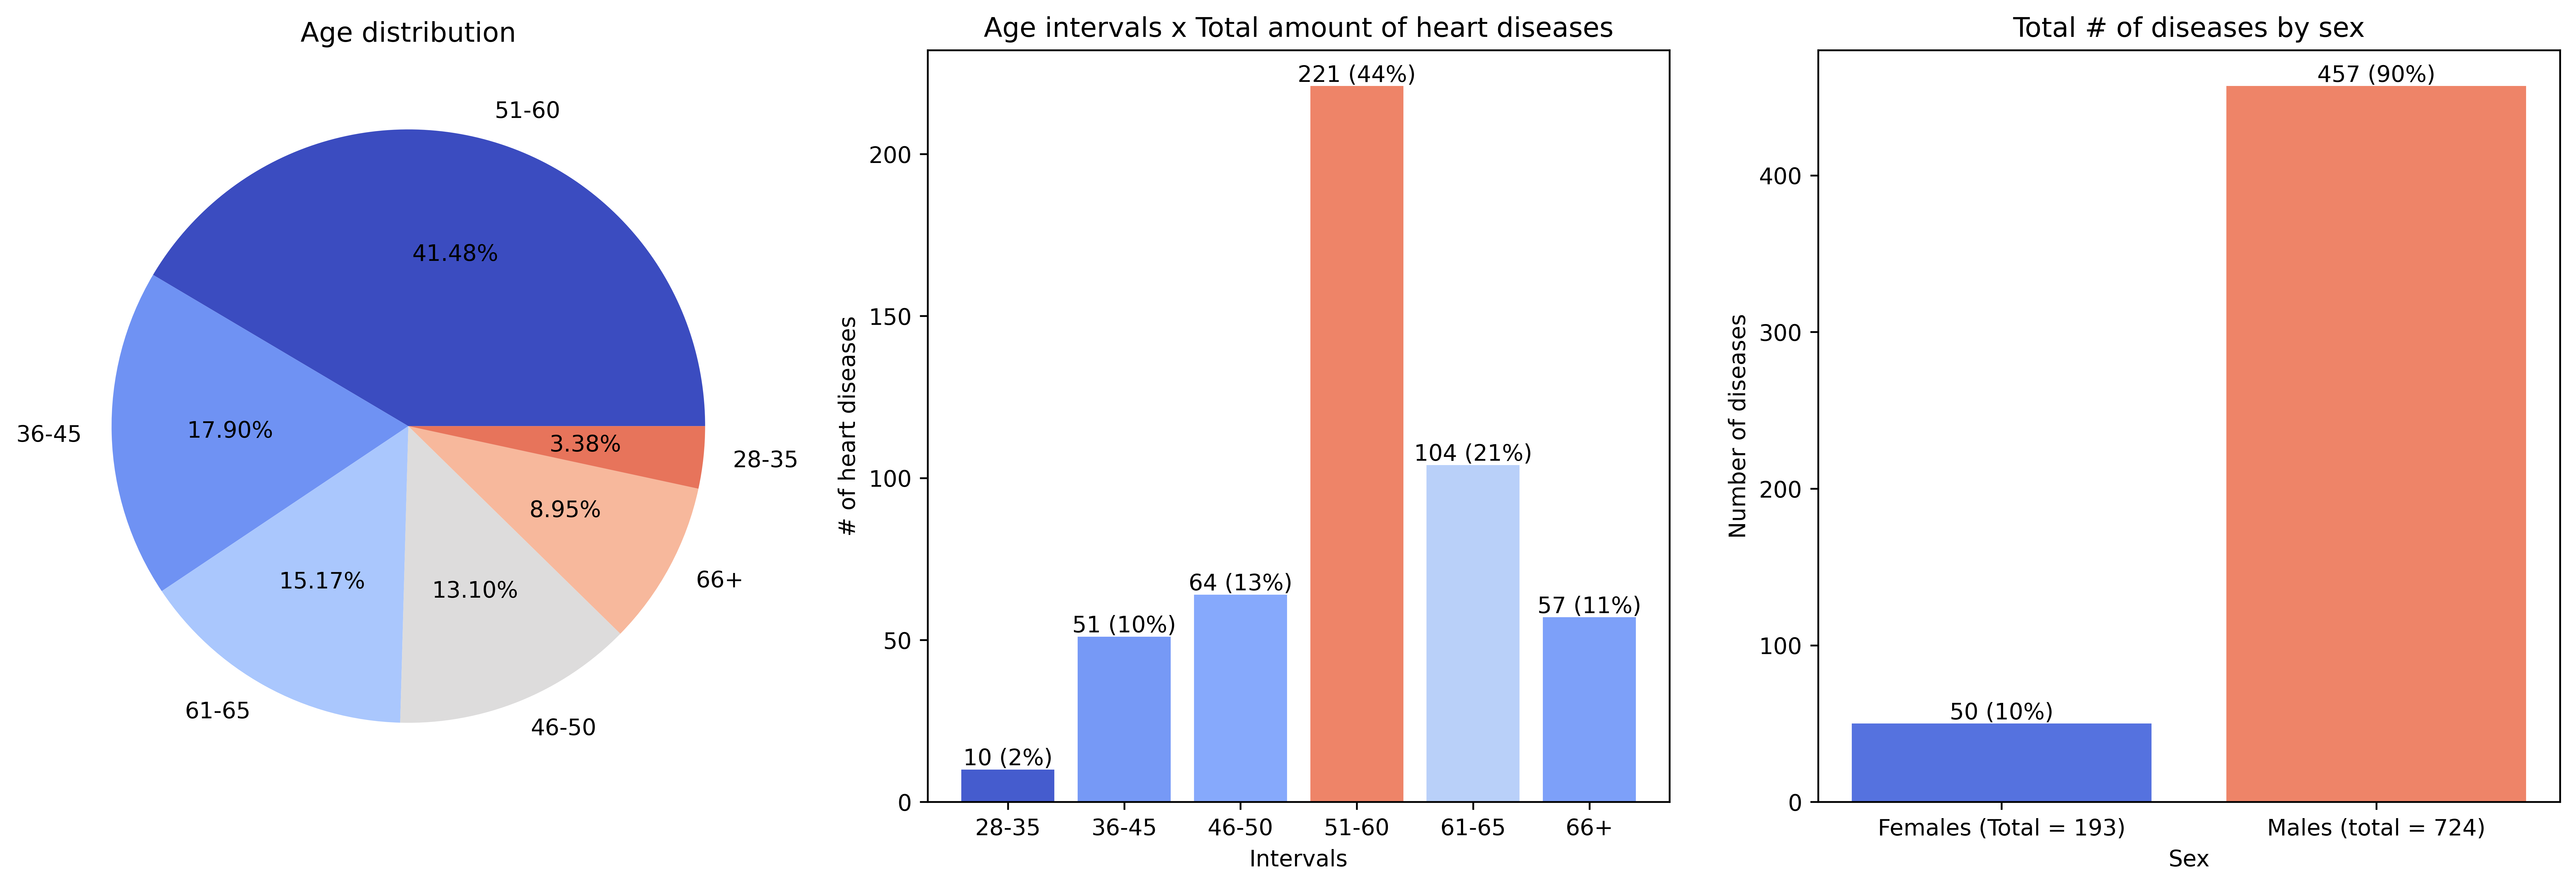

In [19]:
# Plot 1
agebydisease = df[["Age", "HeartDisease"]]
agebydisease.loc[:, "Age"] = cut_on_age(agebydisease)
data = agebydisease.groupby("Age", observed=True).sum()
vals = data["HeartDisease"]

fig, axs = plt.subplots(1, 3, figsize=(20, 6), dpi=600)
info = cut_on_age(df).value_counts()
axs[0].pie(info, labels=info.index.values, autopct="%1.2f%%", colors=colors(info))
_ = axs[0].set_title("Age distribution")

# Plot 2

bars = axs[1].bar(x=data.index.values, height=vals.values, color=plt.cm.coolwarm(vals / (vals.max() * 1.25)))
axs[1].set_ylabel("# of heart diseases")
axs[1].set_xlabel("Intervals")
axs[1].set_title("Age intervals x Total amount of heart diseases")

for bar in bars:
    h = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width() / 2, h, f'{h} ({int(round(h / vals.sum(), 2) * 100)}%)', ha='center', va='bottom')
    
    
# Plot 3
    
info = df[["Sex", "HeartDisease"]].groupby("Sex").sum()
vals = info["HeartDisease"]
m, f = df["Sex"].value_counts().values
bars = axs[2].bar(x=info.rename(index={'M': f'Males (total = {m})', 'F': f"Females (Total = {f})"}).index, height=vals, color=plt.cm.coolwarm(vals / (vals.max() * 1.25)))

for bar in bars:
    h = bar.get_height()
    axs[2].text(bar.get_x() + bar.get_width() / 2, h, f'{h} ({int(round(h / vals.sum(), 2) * 100)}%)', ha='center', va='bottom')
    
axs[2].set_xlabel("Sex")
axs[2].set_ylabel("Number of diseases")
axs[2].set_title("Total # of diseases by sex")

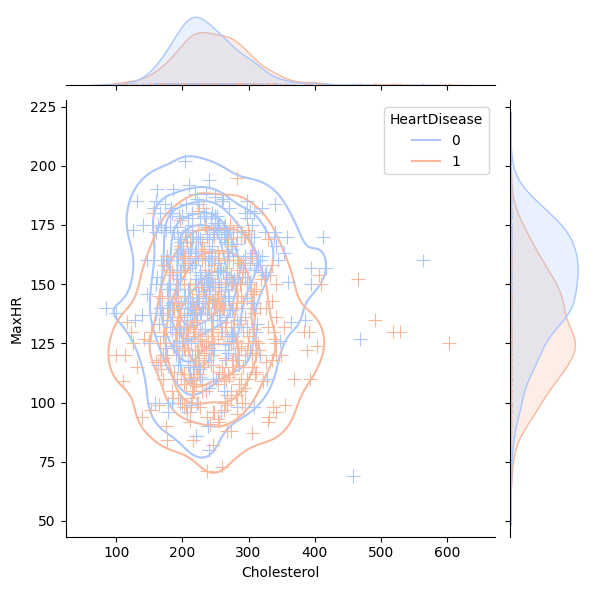

In [20]:
import seaborn as sns

filtr = df["Cholesterol"] > 0
g = sns.jointplot(df[filtr], x="Cholesterol", y="MaxHR", hue='HeartDisease', palette="coolwarm", marker='+', s=100)
g.plot_joint(sns.kdeplot, zorder=0, levels=6)
_ = g.plot_marginals(sns.rugplot, clip_on=False)

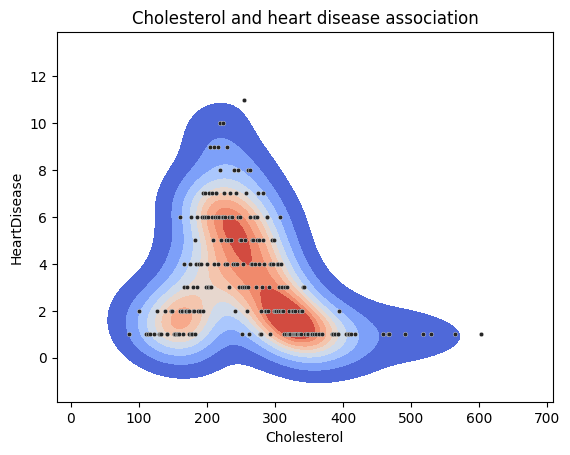

In [71]:
info = (df[["Cholesterol", "HeartDisease"]].groupby("Cholesterol").count().drop(0))
ax, fig = plt.subplots()
sns.kdeplot(info, x="Cholesterol", y="HeartDisease", cmap="coolwarm", fill=True)
sns.scatterplot(info, x="Cholesterol", y="HeartDisease", s=10, color=".15")
# sns.histplot(info, x="Cholesterol", y="HeartDisease", pthresh=.1, bins=100, cmap="mako")
_ = plt.title("Cholesterol and heart disease association")

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 917 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    object 
 2   ChestPainType   917 non-null    object 
 3   RestingBP       917 non-null    int64  
 4   Cholesterol     917 non-null    int64  
 5   FastingBS       917 non-null    int64  
 6   RestingECG      917 non-null    object 
 7   MaxHR           917 non-null    int64  
 8   ExerciseAngina  917 non-null    object 
 9   Oldpeak         917 non-null    float64
 10  ST_Slope        917 non-null    object 
 11  HeartDisease    917 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 93.1+ KB


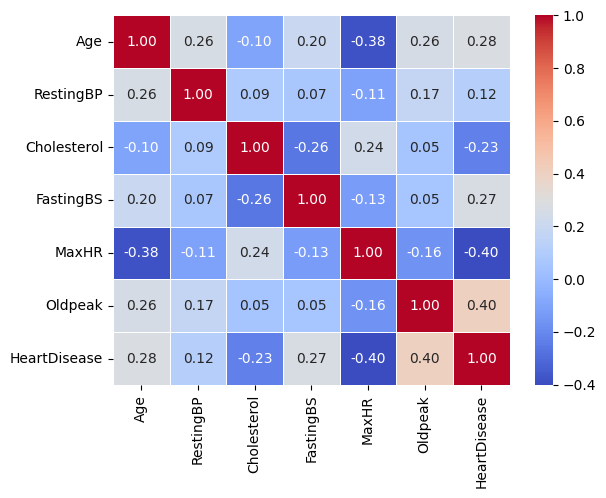

In [70]:
ax = sns.heatmap(df[["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak", "HeartDisease"]].corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidth=0.5)